# TAREA 2


## 1 PCA

In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
import zipfile
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import seaborn as sns; sns.set()
%matplotlib inline

In [ ]:
from scipy.io import loadmat
import glob
import random
import matplotlib.image as img
#Install pillow
from PIL import Image

d_name = 'C:/Users/andre/Downloads/Tarea 2 -Estadistica/rawdata/rawdata'
sample = 0.2
X = []
for nfile in  os.listdir(d_name):
    if random.random() <= sample:
        bytes_read = open(os.path.join(d_name,nfile), "rb").read()
        img = Image.frombytes('L', (128,128), bytes_read)
        X.append(np.array(img).flatten())

X = np.array(X)

### 1. Calcular la mean face. Que es la cara con el promedio de los pixeles y visualizarla.


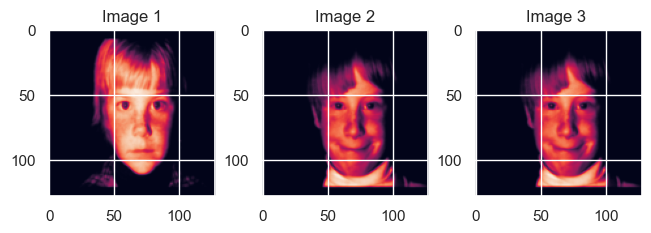

In [11]:
def plot_1_images(data, label="Image 1", ax=None):
    fn_shape = lambda X: X.reshape(128,128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(fn_shape(data))
    ax.set_title(label=label)
    return fig,ax

def plot_2_images(data, label="Image 2", ax=None):
    fn_shape = lambda X: X.reshape(128,128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(fn_shape(data))
    ax.set_title(label=label)
    return fig,ax

def plot_3_images(data, label="Image 3", ax=None):
    fn_shape = lambda X: X.reshape(128,128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(fn_shape(data))
    ax.set_title(label=label)
    return fig,ax

def plot_4_images(data, label="Image 4", ax=None):
    fn_shape = lambda X: X.reshape(128,128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(fn_shape(data))
    ax.set_title(label=label)
    return fig,ax
 
def plot_5_images(data, label="Image 5", ax=None):
    fn_shape = lambda X: X.reshape(128,128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(fn_shape(data))
    ax.set_title(label=label)
    return fig,ax

def plot_13_images(data,ix_1, ix_2 , ix_3):
    fn_shape = lambda X: X.reshape(128,128)
    fig, ax = plt.subplots(1,3, constrained_layout=True)
    ax[0].imshow(fn_shape(data[ix_1]))
    ax[0].set_title(label="Image %s"% ix_1)
    ax[1].imshow(fn_shape(data[ix_2]))
    ax[1].set_title(label="Image %s"% ix_2)
    ax[2].imshow(fn_shape(data[ix_2]))
    ax[2].set_title(label="Image %s "% ix_3)
    plt.show()
plot_13_images(X, 1, 2 , 3)

#### 1- Quitamos la media de los datos

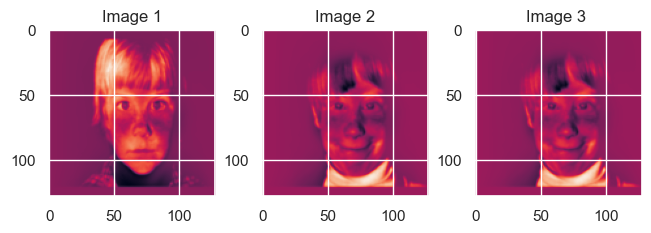

In [13]:
X_mean = X.mean(axis=0)
X_center = X - X_mean
plot_13_images(X_center,1, 2 ,3)

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

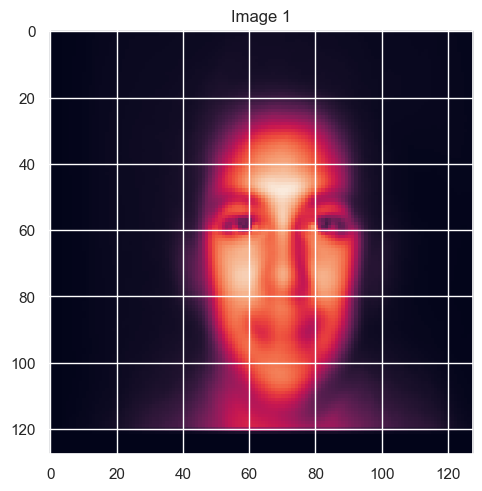

In [14]:
plot_1_images(X_mean)


#### Calcular eigenvalues y eigen vectors

In [15]:
from sklearn.decomposition import PCA
pca = PCA()
# images x dim
X_reduced = pca.fit_transform(X_center)

In [16]:
eigen_values = pca.explained_variance_
eigen_faces = pca.components_

#### ¿Cuántos componentes se deben utilizar para mantener el 90% de las características?

In [17]:
variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(variance_ratio_cumulative >= 0.9) + 1
print("Número de componentes necesarios para mantener el 90% de la varianza:", n_components)


Número de componentes necesarios para mantener el 90% de la varianza: 64


#### Crea una tabla para mostrar las primeras 5 caras utilizando la mean face más los datos reconstruidos utilizando diferentes cantidades de componentes.

In [18]:
variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)
n_components_99 = np.argmax(variance_ratio_cumulative >= 0.99) + 1
print("Número de componentes necesarios para mantener el 99% de la varianza:", n_components_99)


Número de componentes necesarios para mantener el 99% de la varianza: 367


(None, <Axes: title={'center': 'Con 361 eigenfaces'}>)

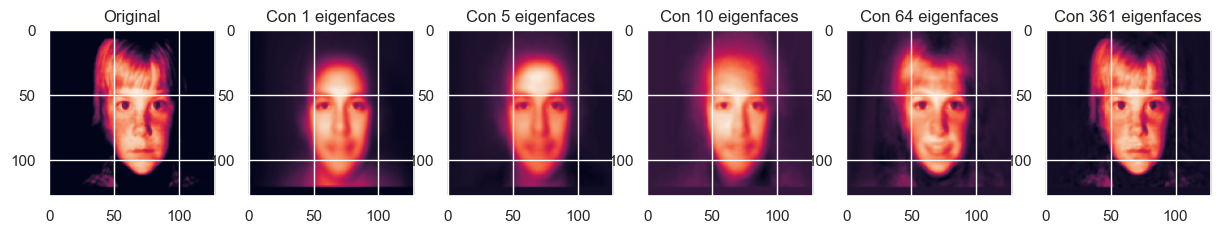

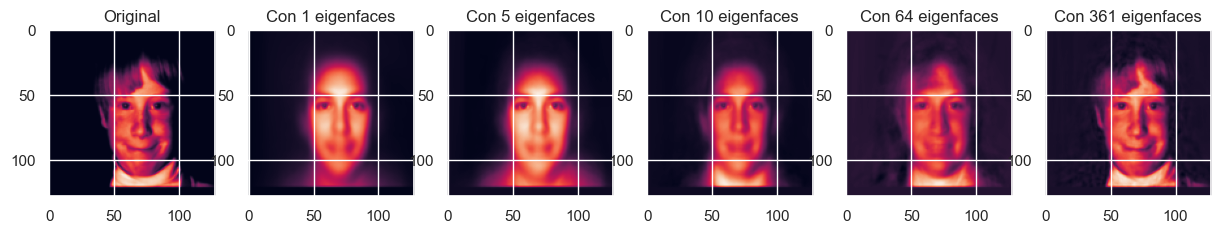

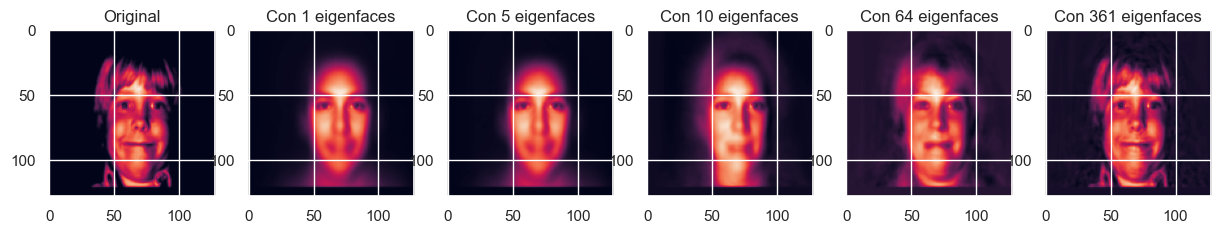

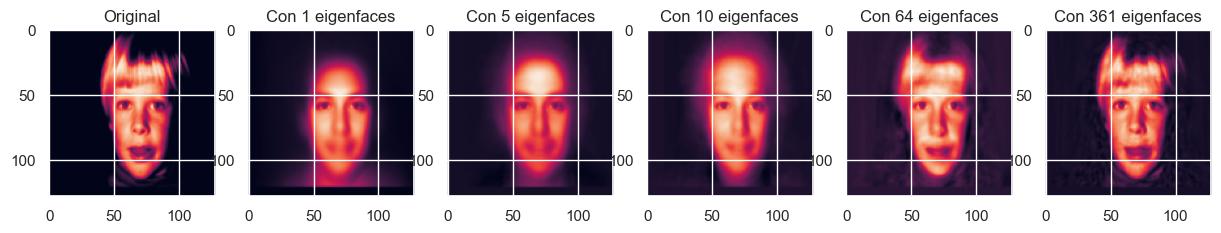

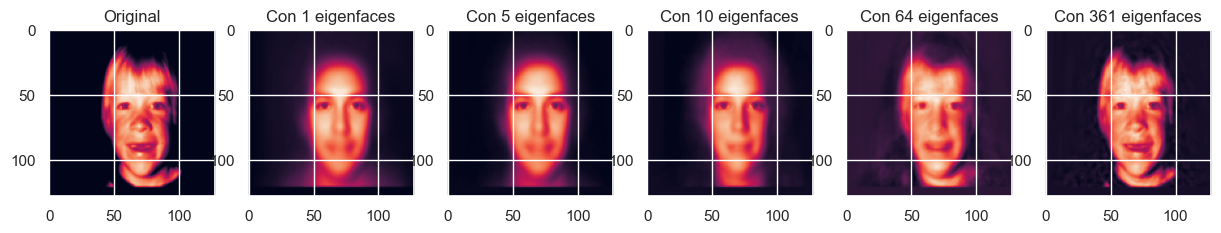

In [20]:
face_original_1= X[1]
face_1_1 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:1],
                                 eigen_faces[:1,:]),
                            axis=0)
face_1_5 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:5],
                                      eigen_faces[:5,:]),
                               axis=0)


face_1_10 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:10],
                                      eigen_faces[:10,:]),
                               axis=0)

face_1_64 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:64],
                                     eigen_faces[:64,:]),
                              axis=0)

face_1_361 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:361],
                                     eigen_faces[:361,:]),
                              axis=0)
##############################################################################

face_original_2= X[2]
face_2_1 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:1],
                                 eigen_faces[:1,:]),
                            axis=0)
face_2_5 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:5],
                                      eigen_faces[:5,:]),
                               axis=0)


face_2_10 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:10],
                                      eigen_faces[:10,:]),
                               axis=0)

face_2_64 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:64],
                                     eigen_faces[:64,:]),
                              axis=0)

face_2_361 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:361],
                                     eigen_faces[:361,:]),
                              axis=0)
##############################################################################

face_original_3= X[3]
face_3_1 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:1],
                                 eigen_faces[:1,:]),
                            axis=0)
face_3_5 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:5],
                                      eigen_faces[:5,:]),
                               axis=0)


face_3_10 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:10],
                                      eigen_faces[:10,:]),
                               axis=0)

face_3_64 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:64],
                                     eigen_faces[:64,:]),
                              axis=0)

face_3_361 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:361],
                                     eigen_faces[:361,:]),
                              axis=0)
##############################################################################

face_original_4= X[4]
face_4_1 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:1],
                                 eigen_faces[:1,:]),
                            axis=0)
face_4_5 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:5],
                                      eigen_faces[:5,:]),
                               axis=0)


face_4_10 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:10],
                                      eigen_faces[:10,:]),
                               axis=0)

face_4_64 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:64],
                                     eigen_faces[:64,:]),
                              axis=0)

face_4_361 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:361],
                                     eigen_faces[:361,:]),
                              axis=0)
##############################################################################

face_original_5= X[5]
face_5_1 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:1],
                                 eigen_faces[:1,:]),
                            axis=0)
face_5_5 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:5],
                                      eigen_faces[:5,:]),
                               axis=0)


face_5_10 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:10],
                                      eigen_faces[:10,:]),
                               axis=0)

face_5_64 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:64],
                                     eigen_faces[:64,:]),
                              axis=0)

face_5_361 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:361],
                                     eigen_faces[:361,:]),
                              axis=0)


fig, ax = plt.subplots(1,6,figsize=(15,15))
plot_1_images(face_original_1, ax=ax[0], label="Original")
plot_1_images(face_1_1,ax=ax[1],label="Con 1 eigenfaces")
plot_1_images(face_1_5,ax=ax[2],label="Con 5 eigenfaces")
plot_1_images(face_1_10,ax=ax[3],label="Con 10 eigenfaces")
plot_1_images(face_1_64,ax=ax[4],label="Con 64 eigenfaces")
plot_1_images(face_1_361,ax=ax[5],label="Con 361 eigenfaces")
##############################################################
fig, ax = plt.subplots(1,6,figsize=(15,15))
plot_2_images(face_original_2, ax=ax[0], label="Original")
plot_2_images(face_2_1,ax=ax[1],label="Con 1 eigenfaces")
plot_2_images(face_2_5,ax=ax[2],label="Con 5 eigenfaces")
plot_2_images(face_2_10,ax=ax[3],label="Con 10 eigenfaces")
plot_2_images(face_2_64,ax=ax[4],label="Con 64 eigenfaces")
plot_2_images(face_2_361,ax=ax[5],label="Con 361 eigenfaces")
##############################################################
fig, ax = plt.subplots(1,6,figsize=(15,15))
plot_3_images(face_original_3, ax=ax[0], label="Original")
plot_3_images(face_3_1,ax=ax[1],label="Con 1 eigenfaces")
plot_3_images(face_3_5,ax=ax[2],label="Con 5 eigenfaces")
plot_3_images(face_3_10,ax=ax[3],label="Con 10 eigenfaces")
plot_3_images(face_3_64,ax=ax[4],label="Con 64 eigenfaces")
plot_3_images(face_3_361,ax=ax[5],label="Con 361 eigenfaces")
##############################################################
fig, ax = plt.subplots(1,6,figsize=(15,15))
plot_4_images(face_original_4, ax=ax[0], label="Original")
plot_4_images(face_4_1,ax=ax[1],label="Con 1 eigenfaces")
plot_4_images(face_4_5,ax=ax[2],label="Con 5 eigenfaces")
plot_4_images(face_4_10,ax=ax[3],label="Con 10 eigenfaces")
plot_4_images(face_4_64,ax=ax[4],label="Con 64 eigenfaces")
plot_4_images(face_4_361,ax=ax[5],label="Con 361 eigenfaces")
##############################################################
fig, ax = plt.subplots(1,6,figsize=(15,15))
plot_5_images(face_original_5, ax=ax[0], label="Original")
plot_5_images(face_5_1,ax=ax[1],label="Con 1 eigenfaces")
plot_5_images(face_5_5,ax=ax[2],label="Con 5 eigenfaces")
plot_5_images(face_5_10,ax=ax[3],label="Con 10 eigenfaces")
plot_5_images(face_5_64,ax=ax[4],label="Con 64 eigenfaces")
plot_5_images(face_5_361,ax=ax[5],label="Con 361 eigenfaces")

### ¿Qué se puede concluir de los resultados?


#### al utilizar PCA y un conjunto de imágenes de caras, se pueden extraer los componentes principales o eigenfaces que representan las características más importantes de las caras. Al utilizar estos eigenfaces, se puede reconstruir una imagen de la cara original con una cantidad reducida de características.
#### Se encontró que al utilizar un número mayor de eigenfaces, la calidad de la reconstrucción mejora. Sin embargo, se observó que con 10 o más eigenfaces, la reconstrucción es bastante buena, y al utilizar 64 eigenfaces, la reconstrucción es prácticamente idéntica a la imagen original. Al utilizar una cantidad aún mayor de eigenfaces, no se observó una mejora significativa en la calidad de la reconstrucción.
#### En conclusión, se puede utilizar un número reducido de eigenfaces para representar las características más importantes de las caras, lo que permite una reconstrucción precisa con una complejidad computacional manejable.

## 2 K-means

In [21]:
class KMeans:
    def __init__(self, n_clusters, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
    def fit(self, X):
        n_samples, n_features = X.shape

        # inicializar los centroides de forma aleatoria
        self.centroids = X[np.random.choice(n_samples, self.n_clusters, replace=False)]

        # iterar hasta convergencia o hasta que se alcance el número máximo de iteraciones
        for i in range(self.max_iter):
            # asignar cada punto al cluster más cercano
            distances = np.zeros((n_samples, self.n_clusters))
            for j in range(self.n_clusters):
                distances[:, j] = np.linalg.norm(X - self.centroids[j], axis=1)
            self.labels = np.argmin(distances, axis=1)

            # actualizar los centroides como el promedio de los puntos asignados a cada cluster
            for j in range(self.n_clusters):
                self.centroids[j] = np.mean(X[self.labels == j], axis=0)

In [22]:
    def predict(self, X):
            # X es una matriz con las componentes principales de las imágenes
            y_pred = []
            for i in range(X.shape[0]):
                distances = [np.linalg.norm(X[i]-centroid) for centroid in self.centroids]
                cluster_idx = np.argmin(distances)
                y_pred.append(cluster_idx)
            return y_pred

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_pred = kmeans.predict(X)

C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [ ]:
for i in range(kmeans.n_clusters):
    cluster_i = np.where(y_pred == i)[0]  # índices de los puntos en el cluster i
    centroid_i = kmeans.centroids[i]  # coordenadas del centroide del cluster i
    distances = [np.linalg.norm(X[j]-centroid_i) for j in cluster_i]  # distancias de cada punto al centroide
    closest_idxs = np.argsort(distances)[:3]  # índices de las 3 caras más cercanas al centroide
    closest_faces = [your_original_faces_dataset[j] for j in cluster_i[closest_idxs]]  # cargar las imágenes originales correspondientes a los puntos seleccionados
    # describir las similitudes entre estas caras y por qué están cerca una de la otra

#### Creacion de tabla

In [ ]:
# ajustar el modelo k-means a los datos
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# obtener los centroides y las etiquetas de los clusters
centroids = kmeans.centroids
labels = kmeans.labels

# inicializar la tabla
tabla = pd.DataFrame(columns=['cluster', 'centroide', '1era cara cercana al cluster', '2da cara cercana al cluster', '3era cara cercana al cluster', '¿Qué tienen en común?'])

# iterar sobre los clusters
for cluster in range(kmeans.n_clusters):
    # encontrar las 3 caras más cercanas al centroide del cluster
    closest_faces = X[labels == cluster][np.argsort(np.linalg.norm(X[labels == cluster] - centroids[cluster], axis=1))[:3]]
    
    # agregar una fila a la tabla
    tabla = tabla.append({
        'cluster': cluster,
        'centroide': centroids[cluster],
        '1era cara cercana al cluster': closest_faces[0],
        '2da cara cercana al cluster': closest_faces[1],
        '3era cara cercana al cluster': closest_faces[2],
        '¿Qué tienen en común?': 'las facciones mas llamativas de las caras son sus ojos, la forma de la nariz y la sombre del pelo'
    }, ignore_index=True)

# mostrar la tabla
print(tabla)

## 3 Regresión

In [315]:
import numpy as np
import os
import xlrd
import openpyxl
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import tarfile
import zipfile
from sklearn.cluster import AgglomerativeClustering
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import plotly.figure_factory as ff
import plotly.express as px
import statsmodels.api as sm
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [4]:
global static_img
static_img=True
def display_static(fig):
    if static_img:
        return Image(fig.to_image(format="png"))
    else:
        return fig

In [5]:
path = 'C:/Users/andre/Downloads/UCO_ML_AI-master/UCO_ML_AI-master/src/notebook_class/tarea2/data/pruebas_saber/Resultados_Saber_TyT_Gen_ricas_2020-1.csv'
df = pd.read_csv(path, low_memory=False)

NameError: name 'pd' is not defined

In [6]:
df.describe(include = 'all')



NameError: name 'df' is not defined

### 1.1¿Qué variables son importantes para predecir el valor?
Las variables a tener en cuenta al momento de predecir el valor del puntaje en las pruebas saber, no deben tener menos de 30 datos, ya que no muestra tendencia, además las que únicamente tienen un tipo de dato como por ejemplo "ESTU_EXTERIOR" o que un tipo de dato tiene muchos más datos (más del 90%) que los otros no se tomaran en cuenta, tampoco las variables que por deducción y análisis no tienen relación alguna para predecir la variable objetivo.

Teniendo esto en cuenta se realiza la agrupación de datos de las variables categoricas para las dummy variables y se organizan algunas variables para que sea más sencillo representar el modelo.

#### Eliminamos categorias que no vamos a utilizar

In [319]:
df_imp_var = df.drop(columns = {"ESTU_TIPODOCUMENTO","ESTU_NACIONALIDAD","ESTU_EXTERIOR","PERIODO","ESTU_CONSECUTIVO","ESTU_ESTUDIANTE","ESTU_PAIS_RESIDE","ESTU_DISC_FISICA","ESTU_DISC_SISTEM","ESTU_DISC_AUDITCASTELL","ESTU_DISC_AUDITLSC","ESTU_DISC_VISUALCEGUE","ESTU_DISC_VISUALBAJA","ESTU_DISC_VOZHABLA","ESTU_DISC_INTELEC","ESTU_DISC_ESPAUTISTA","ESTU_DISC_PSICOSOCIAL","ESTU_DISC_ASPERGER","ESTU_COD_RESIDE_DEPTO","ESTU_COD_RESIDE_MCPIO","ESTU_CODDANE_COLE_TERMINO","ESTU_COD_COLE_MCPIO_TERMINO","ESTU_OTROCOLE_TERMINO","ESTU_PAGOMATRICULACREDITO","ESTU_PAGOMATRICULAPADRES","ESTU_PAGOMATRICULAPROPIO","ESTU_TIPODOCUMENTOSB11","FAMI_EDUCACIONPADRE","FAMI_EDUCACIONMADRE","FAMI_TRABAJOLABORPADRE","FAMI_TRABAJOLABORMADRE","FAMI_TIENELAVADORA","FAMI_TIENEHORNOMICROOGAS","FAMI_TIENEAUTOMOVIL","FAMI_TIENEMOTOCICLETA","FAMI_CUANTOSCOMPARTEBAÑO","INST_COD_INSTITUCION","ESTU_SNIES_PRGMACADEMICO","ESTU_PRGM_CODMUNICIPIO","ESTU_INST_CODMUNICIPIO","ESTU_PRIVADO_LIBERTAD","ESTU_COD_MCPIO_PRESENTACION","ESTU_MCPIO_PRESENTACION","ESTU_DEPTO_PRESENTACION","ESTU_COD_DEPTO_PRESENTACION","MOD_RAZONA_CUANTITAT_PUNT","MOD_RAZONA_CUANTITATIVO_PNAL","MOD_RAZONA_CUANTITATIVO_PNBC","MOD_LECTURA_CRITICA_PUNT","MOD_LECTURA_CRITICA_PNAL","MOD_LECTURA_CRITICA_PNBC","MOD_COMPETEN_CIUDADA_PUNT","MOD_COMPETEN_CIUDADA_PNAL","MOD_COMPETEN_CIUDADA_PNBC","MOD_INGLES_PUNT","MOD_INGLES_DESEM","MOD_INGLES_PNAL","MOD_INGLES_PNBC","MOD_COMUNI_ESCRITA_PUNT","MOD_COMUNI_ESCRITA_DESEM","MOD_COMUNI_ESCRITA_PNAL","MOD_COMUNI_ESCRITA_PNBC","PERCENTIL_GLOBAL","PERCENTIL_NBC","ESTU_ESTADOINVESTIGACION","FAMI_TIENESERVICIOTV","FAMI_TIENECOMPUTADOR","FAMI_TIENECONSOLAVIDEOJUEGOS"})
df_imp_var.describe(include = 'all')

,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,ESTU_AREARESIDE,ESTU_ESTADOCIVIL,ESTU_COLE_TERMINO,ESTU_TITULOOBTENIDOBACHILLER,ESTU_PAGOMATRICULABECA,ESTU_COMOCAPACITOEXAMENSB11,ESTU_SEMESTRECURSA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,GRUPOREFERENCIA,ESTU_PRGM_MUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_NUCLEO_PREGRADO,ESTU_INST_MUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,INST_ORIGEN,PUNT_GLOBAL
count,68597,68667,68688,68688,58499,58190,37609,58465,58461,58475,58465,64573,64460,63706,63606,68725,68725,68725,68725,68725,68725,68725,68725,68725,68725,68725,68725,68725.000000
unique,2,10735,34,913,2,4,7201,3,2,3,12,7,2,7,5,184,982,20,136,32,2,3,50,51,25,5,6,NaN
top,M,09/21/2000 12:00:00 AM,BOGOTÁ,BOGOTÁ D.C.,Cabecera Municipal,Soltero,INST EDUC CEFA,Bachiller académico,No,Repasó por cuenta propia,04,Estrato 2,Si,No pago semestre,Más de 30 horas,SERVICIO NACIONAL DE APRENDIZAJE-SENA,TECNOLOGÍA EN CONTABILIDAD Y FINANZAS,TECNOLÓGICO EN ADMINISTRACIÓN Y TURISMO,BOGOTÁ D.C.,BOGOTÁ,TECNOLOGÍA,PRESENCIAL,ADMINISTRACIÓN,BOGOTÁ D.C.,BOGOTÁ,INSTITUCIÓN TECNOLÓGICA,OFICIAL NACIONAL,NaN
freq,34798,45,19894,19894,49073,45727,112,39880,48219,42010,22153,29672,56479,40140,26619,45486,3261,29267,24912,24912,61358,60443,23765,56978,56978,49340,51598,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.195213
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.098347
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.000000


### 1.2. Existen nulos?, ¿cómo se deben imputar?

In [320]:
df_imp_var.isnull().sum()

ESTU_GENERO                         128
ESTU_FECHANACIMIENTO                 58
ESTU_DEPTO_RESIDE                    37
ESTU_MCPIO_RESIDE                    37
ESTU_AREARESIDE                   10226
ESTU_ESTADOCIVIL                  10535
ESTU_COLE_TERMINO                 31116
ESTU_TITULOOBTENIDOBACHILLER      10260
ESTU_PAGOMATRICULABECA            10264
ESTU_COMOCAPACITOEXAMENSB11       10250
ESTU_SEMESTRECURSA                10260
FAMI_ESTRATOVIVIENDA               4152
FAMI_TIENEINTERNET                 4265
ESTU_VALORMATRICULAUNIVERSIDAD     5019
ESTU_HORASSEMANATRABAJA            5119
INST_NOMBRE_INSTITUCION               0
ESTU_PRGM_ACADEMICO                   0
GRUPOREFERENCIA                       0
ESTU_PRGM_MUNICIPIO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_NIVEL_PRGM_ACADEMICO             0
ESTU_METODO_PRGM                      0
ESTU_NUCLEO_PREGRADO                  0
ESTU_INST_MUNICIPIO                   0
ESTU_INST_DEPARTAMENTO                0


#### observacion: Podemos ver que existen muchos valores nulos, mas en concreto en la variable "ESTU_COLE_TERMINO". Estos datos se podrian eliminar ya que no son ni la mitad del total de los datos, siendo 31116 los datos nulos y 37609 los demas datos (45.2% datos nulos). las demas categorias tambien tienen un porcentaje relativamente bajo de valores nulos por ende se borran las filas con dichos datos para un mejor analisis.

In [321]:
df_imp_var = df_imp_var.dropna()

In [322]:
df_imp_var.dtypes

ESTU_GENERO                       object
ESTU_FECHANACIMIENTO              object
ESTU_DEPTO_RESIDE                 object
ESTU_MCPIO_RESIDE                 object
ESTU_AREARESIDE                   object
ESTU_ESTADOCIVIL                  object
ESTU_COLE_TERMINO                 object
ESTU_TITULOOBTENIDOBACHILLER      object
ESTU_PAGOMATRICULABECA            object
ESTU_COMOCAPACITOEXAMENSB11       object
ESTU_SEMESTRECURSA                object
FAMI_ESTRATOVIVIENDA              object
FAMI_TIENEINTERNET                object
ESTU_VALORMATRICULAUNIVERSIDAD    object
ESTU_HORASSEMANATRABAJA           object
INST_NOMBRE_INSTITUCION           object
ESTU_PRGM_ACADEMICO               object
GRUPOREFERENCIA                   object
ESTU_PRGM_MUNICIPIO               object
ESTU_PRGM_DEPARTAMENTO            object
ESTU_NIVEL_PRGM_ACADEMICO         object
ESTU_METODO_PRGM                  object
ESTU_NUCLEO_PREGRADO              object
ESTU_INST_MUNICIPIO               object
ESTU_INST_DEPART

### 1.3. Crear dummy variables para incluirlas en la correlación

#### Identificacion variables categoricas- creacion dummy variables:

In [323]:
df_dummies= pd.get_dummies(df_imp_var[["ESTU_GENERO","ESTU_AREARESIDE","ESTU_ESTADOCIVIL","ESTU_TITULOOBTENIDOBACHILLER","ESTU_PAGOMATRICULABECA","ESTU_COMOCAPACITOEXAMENSB11","ESTU_SEMESTRECURSA","FAMI_ESTRATOVIVIENDA","FAMI_TIENEINTERNET","ESTU_VALORMATRICULAUNIVERSIDAD","ESTU_HORASSEMANATRABAJA","ESTU_NIVEL_PRGM_ACADEMICO","ESTU_METODO_PRGM","INST_CARACTER_ACADEMICO","INST_ORIGEN"]],
                            prefix=["ESTU_GENERO","ESTU_AREARESIDE","ESTU_ESTADOCIVIL","ESTU_TITULOOBTENIDOBACHILLER","ESTU_PAGOMATRICULABECA","ESTU_COMOCAPACITOEXAMENSB11","ESTU_SEMESTRECURSA","FAMI_ESTRATOVIVIENDA","FAMI_TIENEINTERNET","ESTU_VALORMATRICULAUNIVERSIDAD","ESTU_HORASSEMANATRABAJA","ESTU_NIVEL_PRGM_ACADEMICO","ESTU_METODO_PRGM","INST_CARACTER_ACADEMICO","INST_ORIGEN"],
                            dummy_na=False, drop_first=False)

In [324]:
df_dummies = pd.concat((df_dummies,df_imp_var), axis=1)

In [325]:
cols = [c for c in df_dummies.columns if c.startswith("ESTU_GENERO_") or c.startswith("ESTU_AREARESIDE_") or c.startswith("ESTU_ESTADOCIVIL_") or c.startswith("ESTU_TITULOOBTENIDOBACHILLER_") or c.startswith("ESTU_PAGOMATRICULABECA_") or c.startswith("ESTU_COMOCAPACITOEXAMENSB11_") or c.startswith("ESTU_SEMESTRECURSA_") or c.startswith("FAMI_ESTRATOVIVIENDA_") or c.startswith("FAMI_TIENEINTERNET_") or c.startswith("ESTU_VALORMATRICULAUNIVERSIDAD_") or c.startswith("ESTU_HORASSEMANATRABAJA_") or c.startswith("ESTU_NIVEL_PRGM_ACADEMICO_") or c.startswith("ESTU_METODO_PRGM_") or c.startswith("INST_CARACTER_ACADEMICO_") or c.startswith("INST_ORIGEN_")] + ["PUNT_GLOBAL"]

In [326]:
df_dummies[cols].head(10)

,ESTU_GENERO_F,ESTU_GENERO_M,ESTU_AREARESIDE_Area Rural,ESTU_AREARESIDE_Cabecera Municipal,ESTU_ESTADOCIVIL_Casado,ESTU_ESTADOCIVIL_Separado y/o Viudo,ESTU_ESTADOCIVIL_Soltero,ESTU_ESTADOCIVIL_Unión libre,ESTU_TITULOOBTENIDOBACHILLER_Bachiller académico,ESTU_TITULOOBTENIDOBACHILLER_Bachiller pedagógico o normalista,ESTU_TITULOOBTENIDOBACHILLER_Bachiller técnico,ESTU_PAGOMATRICULABECA_No,ESTU_PAGOMATRICULABECA_Si,ESTU_COMOCAPACITOEXAMENSB11_No realizó ninguna prueba de preparación,ESTU_COMOCAPACITOEXAMENSB11_Repasó por cuenta propia,ESTU_COMOCAPACITOEXAMENSB11_Tomó un curso de preparación,ESTU_SEMESTRECURSA_01,ESTU_SEMESTRECURSA_02,ESTU_SEMESTRECURSA_03,ESTU_SEMESTRECURSA_04,ESTU_SEMESTRECURSA_05,ESTU_SEMESTRECURSA_06,ESTU_SEMESTRECURSA_07,ESTU_SEMESTRECURSA_08,ESTU_SEMESTRECURSA_09,ESTU_SEMESTRECURSA_10,ESTU_SEMESTRECURSA_11,ESTU_SEMESTRECURSA_12 o más,FAMI_ESTRATOVIVIENDA_Estrato 1,FAMI_ESTRATOVIVIENDA_Estrato 2,FAMI_ESTRATOVIVIENDA_Estrato 3,FAMI_ESTRATOVIVIENDA_Estrato 4,FAMI_ESTRATOVIVIENDA_Estrato 5,FAMI_ESTRATOVIVIENDA_Estrato 6,FAMI_ESTRATOVIVIENDA_Sin Estrato,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 3 y 5 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 5 y 7 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 500 mil y un millon de pesos,ESTU_VALORMATRICULAUNIVERSIDAD_Entre un millon y 3 millones de pesose,ESTU_VALORMATRICULAUNIVERSIDAD_Mas de 7 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Menos de 500 mil pesos,ESTU_VALORMATRICULAUNIVERSIDAD_No pago semestre,ESTU_HORASSEMANATRABAJA_0,ESTU_HORASSEMANATRABAJA_Entre 11 y 20 horas,ESTU_HORASSEMANATRABAJA_Entre 21 y 30 horas,ESTU_HORASSEMANATRABAJA_Menos de 10 horas,ESTU_HORASSEMANATRABAJA_Más de 30 horas,ESTU_NIVEL_PRGM_ACADEMICO_TECNOLOGÍA,ESTU_NIVEL_PRGM_ACADEMICO_TÉCNICO PROFESIONAL,ESTU_METODO_PRGM_DISTANCIA,ESTU_METODO_PRGM_DISTANCIA VITUAL,ESTU_METODO_PRGM_PRESENCIAL,INST_CARACTER_ACADEMICO_ESCUELA NORMAL SUPERIOR,INST_CARACTER_ACADEMICO_INSTITUCIÓN TECNOLÓGICA,INST_CARACTER_ACADEMICO_INSTITUCIÓN UNIVERSITARIA,INST_CARACTER_ACADEMICO_TÉCNICA PROFESIONAL,INST_CARACTER_ACADEMICO_UNIVERSIDAD,INST_ORIGEN_NO OFICIAL - CORPORACIÓN,INST_ORIGEN_NO OFICIAL - FUNDACIÓN,INST_ORIGEN_OFICIAL DEPARTAMENTAL,INST_ORIGEN_OFICIAL MUNICIPAL,INST_ORIGEN_OFICIAL NACIONAL,INST_ORIGEN_REGIMEN ESPECIAL,PUNT_GLOBAL
2,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,60
3,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,80
4,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,116
7,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,50
12,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,90
13,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,102
16,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,85
17,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,71
20,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,97
22,0,1,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,81


### 1.4. Crear una correlación, ¿que variables tienen un efecto positivo en el puntaje y cuales un efecto negativo?.

In [327]:
#define response variable
y = df_dummies['PUNT_GLOBAL']
cols.remove("PUNT_GLOBAL")
x = df_dummies[cols]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     88.95
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        13:02:07   Log-Likelihood:            -1.4727e+05
No. Observations:               34016   AIC:                         2.946e+05
Df Residuals:                   33965   BIC:                         2.951e+05
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

#### Observaciones: Podemos ver que el modelo enrealidad es muy malo ya que tan solo puede explicar un 12% de la varianza, es necesario reevaluar las variables que estamos utilizando en el modelo, todos los p-values con un valor menor a 0.005 son importantes el resto se eliminan, por ejemplo una variable que predice la varianza es el area donde reside el estudiante que tiene un p-values de 0.001 y tambien la variable de si tiene internet o no siendo su p-values de 0.001 tambien (entre otras), el resto de variables no ayudan a predecir.

### 2. Divida los datos en training y testing

In [332]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [333]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [334]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [335]:
x_train= sm.add_constant(x_train)
model_sm = sm.OLS(y_train, x_train).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     59.87
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        13:04:53   Log-Likelihood:            -1.0308e+05
No. Observations:               23811   AIC:                         2.063e+05
Df Residuals:                   23760   BIC:                         2.067e+05
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

### 2.1. Aplique las transformaciones más importantes a los datos. (Hint calcular la edad basada en la fecha de nacimiento, agrupar variables categóricas con mucha cardinalidad en grupos).


#### transformacion variable "ESTU_COLE_TERMINO"

In [336]:
pandas_by_inst_without_mean = df_imp_var[["ESTU_COLE_TERMINO","PUNT_GLOBAL"]].groupby("ESTU_COLE_TERMINO").count()

In [337]:
s_gr_60 = list(pandas_by_inst_without_mean.query("PUNT_GLOBAL > 60").index)

In [338]:
df_imp_var["ESTU_COLE_TERMINO_new"]= df_imp_var.ESTU_COLE_TERMINO.apply(lambda x: x if x in s_gr_60 else "otros")

#### transformacion variable "ESTU_FECHANACIMIENTO"

In [339]:
import datetime

In [340]:
df_imp_var['ESTU_FECHANACIMIENTO'] = pd.to_datetime(df_imp_var['ESTU_FECHANACIMIENTO'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

In [341]:
df_imp_var.loc[df_imp_var['ESTU_FECHANACIMIENTO'] < '1678-01-01', 'ESTU_FECHANACIMIENTO'] = pd.NaT

In [342]:
df_imp_var = df_imp_var.dropna(subset=['ESTU_FECHANACIMIENTO'])

In [343]:
fecha_actual = pd.Timestamp.now()

In [344]:
df_imp_var['EDAD'] = ((fecha_actual - df_imp_var['ESTU_FECHANACIMIENTO']) / pd.Timedelta(seconds=31556952)).astype(int)

#### transformacion variable "ESTU_PRGM_ACADEMICO"

In [345]:
pandas_by_acad_mean = df_imp_var[["ESTU_PRGM_ACADEMICO", "PUNT_GLOBAL"]].groupby("ESTU_PRGM_ACADEMICO").mean()

In [346]:
top_10_2 = pandas_by_acad_mean.sort_values(by="PUNT_GLOBAL", ascending=False).head(10)

In [347]:
df_imp_var["PROMEDIO_1"] = df_imp_var["ESTU_PRGM_ACADEMICO"].map(pandas_by_acad_mean["PUNT_GLOBAL"])

In [348]:
df_imp_var["ESTU_PRGM_ACADEMICO_new"] = df_imp_var["ESTU_PRGM_ACADEMICO"].apply(lambda x: x if x in top_10_2.index else "otros")

#### transformacion variable "INST_NOMBRE_INSTITUCION"

In [349]:
pandas_by_inst_mean = df_imp_var[["INST_NOMBRE_INSTITUCION", "PUNT_GLOBAL"]].groupby("INST_NOMBRE_INSTITUCION").mean()

In [350]:
top_10 = pandas_by_inst_mean.sort_values(by="PUNT_GLOBAL", ascending=False).head(10)

In [351]:
df_imp_var["PROMEDIO"] = df_imp_var["INST_NOMBRE_INSTITUCION"].map(pandas_by_inst_mean["PUNT_GLOBAL"])

In [352]:
df_imp_var["INST_NOMBRE_INSTITUCION_new"] = df_imp_var["INST_NOMBRE_INSTITUCION"].apply(lambda x: x if x in top_10.index else "otros")

#### Actualizar datos para hacer test

In [353]:
df_dummies_new= pd.get_dummies(df_imp_var[["ESTU_GENERO","ESTU_AREARESIDE","ESTU_ESTADOCIVIL","ESTU_COLE_TERMINO_new","ESTU_PRGM_ACADEMICO_new","INST_NOMBRE_INSTITUCION_new","ESTU_TITULOOBTENIDOBACHILLER","ESTU_PAGOMATRICULABECA","ESTU_COMOCAPACITOEXAMENSB11","ESTU_SEMESTRECURSA","FAMI_ESTRATOVIVIENDA","FAMI_TIENEINTERNET","ESTU_VALORMATRICULAUNIVERSIDAD","ESTU_HORASSEMANATRABAJA","ESTU_NIVEL_PRGM_ACADEMICO","ESTU_METODO_PRGM","INST_CARACTER_ACADEMICO","INST_ORIGEN"]],
                            prefix=["ESTU_GENERO","ESTU_AREARESIDE","ESTU_ESTADOCIVIL","ESTU_COLE_TERMINO_new","ESTU_PRGM_ACADEMICO_new","INST_NOMBRE_INSTITUCION_new","ESTU_TITULOOBTENIDOBACHILLER","ESTU_PAGOMATRICULABECA","ESTU_COMOCAPACITOEXAMENSB11","ESTU_SEMESTRECURSA","FAMI_ESTRATOVIVIENDA","FAMI_TIENEINTERNET","ESTU_VALORMATRICULAUNIVERSIDAD","ESTU_HORASSEMANATRABAJA","ESTU_NIVEL_PRGM_ACADEMICO","ESTU_METODO_PRGM","INST_CARACTER_ACADEMICO","INST_ORIGEN"],
                            dummy_na=False, drop_first=False)
df_dummies_new = pd.concat((df_dummies_new,df_imp_var), axis=1)
cols_2 = [c for c in df_dummies_new.columns if c.startswith("ESTU_GENERO_") or c.startswith("ESTU_AREARESIDE_") or c.startswith("ESTU_ESTADOCIVIL_") or c.startswith("ESTU_COLE_TERMINO_new_") or c.startswith("ESTU_PRGM_ACADEMICO_new_") or c.startswith("INST_NOMBRE_INSTITUCION_new_") or c.startswith("ESTU_TITULOOBTENIDOBACHILLER_") or c.startswith("ESTU_PAGOMATRICULABECA_") or c.startswith("ESTU_COMOCAPACITOEXAMENSB11_") or c.startswith("ESTU_SEMESTRECURSA_") or c.startswith("FAMI_ESTRATOVIVIENDA_") or c.startswith("FAMI_TIENEINTERNET_") or c.startswith("ESTU_VALORMATRICULAUNIVERSIDAD_") or c.startswith("ESTU_HORASSEMANATRABAJA_") or c.startswith("ESTU_NIVEL_PRGM_ACADEMICO_") or c.startswith("ESTU_METODO_PRGM_") or c.startswith("INST_CARACTER_ACADEMICO_") or c.startswith("INST_ORIGEN_")] 
cols_2 = cols_2 + ["PUNT_GLOBAL","EDAD"]

In [354]:
df_dummies_new[cols_2].head(20)

,ESTU_GENERO_F,ESTU_GENERO_M,ESTU_AREARESIDE_Area Rural,ESTU_AREARESIDE_Cabecera Municipal,ESTU_ESTADOCIVIL_Casado,ESTU_ESTADOCIVIL_Separado y/o Viudo,ESTU_ESTADOCIVIL_Soltero,ESTU_ESTADOCIVIL_Unión libre,ESTU_COLE_TERMINO_new_CEDID SAN PABLO BOSA,ESTU_COLE_TERMINO_new_COL DIST FERNANDO MAZUERA VILLEGAS,ESTU_COLE_TERMINO_new_COL. MILITAR ALMIRANTE COLON,ESTU_COLE_TERMINO_new_I.E. SAN ISIDORO - SEDE PRINCIPAL,ESTU_COLE_TERMINO_new_INEM FRANCISCO DE PAULA SANTANDER,ESTU_COLE_TERMINO_new_INEM SANTIAGO PEREZ,ESTU_COLE_TERMINO_new_INST EDUC CEFA,ESTU_COLE_TERMINO_new_INST EDUC INEM JOSE FELIX DE RESTREPO,ESTU_COLE_TERMINO_new_INSTITUCION EDUCATIVA JOSE MANUEL RODRIGUEZ TORICES,ESTU_COLE_TERMINO_new_INSTITUTO TECNICO INDUSTRIAL,ESTU_COLE_TERMINO_new_LICEO CAUCASIA 1A. AGRUPACION,ESTU_COLE_TERMINO_new_SEDE 1 SAN SIMON,ESTU_COLE_TERMINO_new_SEDE A - I E TEC INEM CUSTODIO GARCÍA ROVIRA,ESTU_COLE_TERMINO_new_otros,ESTU_PRGM_ACADEMICO_new_TECNOLOGIA EN SISTEMAS DE INFORMACION,ESTU_PRGM_ACADEMICO_new_TECNOLOGIA EN DIRECCION DE SERVICIOS TURISTICOS,ESTU_PRGM_ACADEMICO_new_TECNOLOGIA EN GESTION COMERCIAL INTERNACIONAL,ESTU_PRGM_ACADEMICO_new_TECNOLOGIA EN INGENIERIA DE SISTEMAS,ESTU_PRGM_ACADEMICO_new_TECNOLOGIA EN INTERPRETACION PARA SORDOS Y SORDOCIEGOS,ESTU_PRGM_ACADEMICO_new_TECNOLOGÍA EN ANIMACIÓN Y POSPRODUCCIÓN AUDIOVISUAL,ESTU_PRGM_ACADEMICO_new_TECNOLOGÍA EN GESTIÓN COMERCIAL,ESTU_PRGM_ACADEMICO_new_TECNOLOGÍA EN PRODUCCIÓN DE SONIDO Y MUSICALIZACIÓN,ESTU_PRGM_ACADEMICO_new_TÉCNICA PROFESIONAL EN PRODUCCIÓN PARA LAS PRÁCTICAS MUSICALES,ESTU_PRGM_ACADEMICO_new_TÉCNICA PROFESIONAL EN SOPORTE DE INFRAESTRUCTURAS INFORMÁTICAS Y REDES DE DATOS,ESTU_PRGM_ACADEMICO_new_otros,INST_NOMBRE_INSTITUCION_new_CORPORACION UNIVERSITARIA UNITEC-BOGOTÁ D.C.,INST_NOMBRE_INSTITUCION_new_CORPORACION UNIVERSITARIA ADVENTISTA-MEDELLIN,INST_NOMBRE_INSTITUCION_new_CORPORACION UNIVERSITARIA DEL CARIBE - CECAR-SINCELEJO,INST_NOMBRE_INSTITUCION_new_CORPORACION UNIVERSITARIA EMPRESARIAL DE SALAMANCA-BARRANQUILLA,INST_NOMBRE_INSTITUCION_new_CORPORACION UNIVERSITARIA REFORMADA - CUR -BARRANQUILLA,INST_NOMBRE_INSTITUCION_new_INSTITUCION UNIVERSITARIA LATINA - UNILATINA-BOGOTÁ D.C.,INST_NOMBRE_INSTITUCION_new_UNIVERSIDAD CATOLICA DE ORIENTE-RIONEGRO,INST_NOMBRE_INSTITUCION_new_UNIVERSIDAD DEL CAUCA-POPAYAN,"INST_NOMBRE_INSTITUCION_new_UNIVERSIDAD DISTRITAL""FRANCISCO JOSE DE CALDAS""-BOGOTÁ D.C.",INST_NOMBRE_INSTITUCION_new_UNIVERSIDAD SANTIAGO DE CALI-PALMIRA,INST_NOMBRE_INSTITUCION_new_otros,ESTU_TITULOOBTENIDOBACHILLER_Bachiller académico,ESTU_TITULOOBTENIDOBACHILLER_Bachiller pedagógico o normalista,ESTU_TITULOOBTENIDOBACHILLER_Bachiller técnico,ESTU_PAGOMATRICULABECA_No,ESTU_PAGOMATRICULABECA_Si,ESTU_COMOCAPACITOEXAMENSB11_No realizó ninguna prueba de preparación,ESTU_COMOCAPACITOEXAMENSB11_Repasó por cuenta propia,ESTU_COMOCAPACITOEXAMENSB11_Tomó un curso de preparación,ESTU_SEMESTRECURSA_01,ESTU_SEMESTRECURSA_02,ESTU_SEMESTRECURSA_03,ESTU_SEMESTRECURSA_04,ESTU_SEMESTRECURSA_05,ESTU_SEMESTRECURSA_06,ESTU_SEMESTRECURSA_07,ESTU_SEMESTRECURSA_08,ESTU_SEMESTRECURSA_09,ESTU_SEMESTRECURSA_10,ESTU_SEMESTRECURSA_11,ESTU_SEMESTRECURSA_12 o más,FAMI_ESTRATOVIVIENDA_Estrato 1,FAMI_ESTRATOVIVIENDA_Estrato 2,FAMI_ESTRATOVIVIENDA_Estrato 3,FAMI_ESTRATOVIVIENDA_Estrato 4,FAMI_ESTRATOVIVIENDA_Estrato 5,FAMI_ESTRATOVIVIENDA_Estrato 6,FAMI_ESTRATOVIVIENDA_Sin Estrato,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 3 y 5 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 5 y 7 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 500 mil y un millon de pesos,ESTU_VALORMATRICULAUNIVERSIDAD_Entre un millon y 3 millones de pesose,ESTU_VALORMATRICULAUNIVERSIDAD_Mas de 7 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Menos de 500 mil pesos,ESTU_VALORMATRICULAUNIVERSIDAD_No pago semestre,ESTU_HORASSEMANATRABAJA_0,ESTU_HORASSEMANATRABAJA_Entre 11 y 20 horas,ESTU_HORASSEMANATRABAJA_Entre 21 y 30 horas,ESTU_HORASSEMANATRABAJA_Menos de 10 horas,ESTU_HORASSEMANATRABAJA_Más d

### 2.2. Entrenar un modelos de regresión


In [355]:
cols_2.remove("PUNT_GLOBAL")
x = df_dummies_new[cols_2]
y = df_dummies_new['PUNT_GLOBAL']

In [356]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=200)

In [357]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [358]:
y_pred = model.predict(x_train)

In [359]:
x_train= sm.add_constant(x_train)
model_sm = sm.OLS(y_train, x_train).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     41.30
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        13:05:17   Log-Likelihood:            -1.0300e+05
No. Observations:               23805   AIC:                         2.062e+05
Df Residuals:                   23721   BIC:                         2.068e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
                                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [360]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

#### calcular de cuanto es el error

In [361]:
y_pred

array([97.53125, 97.90625, 94.34375, ..., 99.59375, 96.78125, 99.375  ])

### 2.3. ¿Cuál es el mejor R squared? Cuál es el MAPE y el MSE

In [362]:
mape = mean_absolute_percentage_error(y_train, y_pred)
mape

0.17023591798500148

In [363]:
mse = mean_squared_error(y_train, y_pred_train)
mse

407.25933287231345

#### Observacion: el mejor R squared es el de test, como el MAPE es del 0.17027 esto quere decir que en promedio, el pronóstico está errado en un 17%. tambien vemos que el MSE es de 334.646 esto quiere decir que el modelo sigue siendo bastante malo


### 3. Remueva las variables que nos son relevantes


In [364]:
df_dummies_final= pd.get_dummies(df_imp_var[["ESTU_GENERO","ESTU_AREARESIDE","ESTU_ESTADOCIVIL","ESTU_TITULOOBTENIDOBACHILLER","ESTU_PAGOMATRICULABECA","ESTU_COMOCAPACITOEXAMENSB11","FAMI_TIENEINTERNET","ESTU_HORASSEMANATRABAJA","ESTU_NIVEL_PRGM_ACADEMICO","ESTU_METODO_PRGM"]],
                            prefix=["ESTU_GENERO","ESTU_AREARESIDE","ESTU_ESTADOCIVIL","ESTU_TITULOOBTENIDOBACHILLER","ESTU_PAGOMATRICULABECA","ESTU_COMOCAPACITOEXAMENSB11","FAMI_TIENEINTERNET","ESTU_HORASSEMANATRABAJA","ESTU_NIVEL_PRGM_ACADEMICO","ESTU_METODO_PRGM"],
                            dummy_na=False, drop_first=False)
df_dummies_final = pd.concat((df_dummies_final,df_imp_var), axis=1)
cols_3 = [c for c in df_dummies_final.columns if c.startswith("ESTU_GENERO_") or c.startswith("ESTU_AREARESIDE_") or c.startswith("ESTU_ESTADOCIVIL_") or c.startswith("ESTU_TITULOOBTENIDOBACHILLER_") or c.startswith("ESTU_PAGOMATRICULABECA_") or c.startswith("ESTU_COMOCAPACITOEXAMENSB11_") or c.startswith("FAMI_TIENEINTERNET_") or c.startswith("ESTU_HORASSEMANATRABAJA_") or c.startswith("ESTU_NIVEL_PRGM_ACADEMICO_") or c.startswith("ESTU_METODO_PRGM_")] 
cols_3 = cols_3 + ["PUNT_GLOBAL","EDAD"]

In [365]:
df_dummies_final[cols_3].head(10)

,ESTU_GENERO_F,ESTU_GENERO_M,ESTU_AREARESIDE_Area Rural,ESTU_AREARESIDE_Cabecera Municipal,ESTU_ESTADOCIVIL_Casado,ESTU_ESTADOCIVIL_Separado y/o Viudo,ESTU_ESTADOCIVIL_Soltero,ESTU_ESTADOCIVIL_Unión libre,ESTU_TITULOOBTENIDOBACHILLER_Bachiller académico,ESTU_TITULOOBTENIDOBACHILLER_Bachiller pedagógico o normalista,ESTU_TITULOOBTENIDOBACHILLER_Bachiller técnico,ESTU_PAGOMATRICULABECA_No,ESTU_PAGOMATRICULABECA_Si,ESTU_COMOCAPACITOEXAMENSB11_No realizó ninguna prueba de preparación,ESTU_COMOCAPACITOEXAMENSB11_Repasó por cuenta propia,ESTU_COMOCAPACITOEXAMENSB11_Tomó un curso de preparación,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si,ESTU_HORASSEMANATRABAJA_0,ESTU_HORASSEMANATRABAJA_Entre 11 y 20 horas,ESTU_HORASSEMANATRABAJA_Entre 21 y 30 horas,ESTU_HORASSEMANATRABAJA_Menos de 10 horas,ESTU_HORASSEMANATRABAJA_Más de 30 horas,ESTU_NIVEL_PRGM_ACADEMICO_TECNOLOGÍA,ESTU_NIVEL_PRGM_ACADEMICO_TÉCNICO PROFESIONAL,ESTU_METODO_PRGM_DISTANCIA,ESTU_METODO_PRGM_DISTANCIA VITUAL,ESTU_METODO_PRGM_PRESENCIAL,PUNT_GLOBAL,EDAD
2,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,60,31
3,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,80,41
4,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,116,49
7,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,50,31
12,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,90,37
13,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,102,38
16,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,85,27
17,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,71,28
20,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,97,34
22,0,1,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,81,43


In [366]:
#define response variable
y = df_dummies_final['PUNT_GLOBAL']
cols_3.remove("PUNT_GLOBAL")
x = df_dummies_final[cols_3]


In [367]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [368]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [369]:
x_train= sm.add_constant(x_train)
model_sm = sm.OLS(y_train, x_train).fit()
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     84.37
Date:                Sun, 07 May 2023   Prob (F-statistic):          3.22e-318
Time:                        13:06:20   Log-Likelihood:            -1.0369e+05
No. Observations:               23805   AIC:                         2.074e+05
Df Residuals:                   23785   BIC:                         2.076e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

#### 4. Utilizando los datos de test medir el MAPE y el MSE de test. Qué tan diferentes son las métricas de training.

In [383]:
import statsmodels.api as sm

# Agregar columna constante a x_train
x_train = sm.add_constant(x_train)

# Ajustar el modelo
model = sm.OLS(y_train, x_train).fit()

# Agregar columna constante a x_test
x_test = sm.add_constant(x_test)

# Aplicar las predicciones al conjunto de datos de prueba
y_pred_test = model.predict(x_test)

In [384]:
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
mape_test

0.1781286355380181

In [385]:
mse_test = mean_squared_error(y_test, y_pred_test)
mse_test

362.41625328961294

### Observaciones y conclusiones:  
##### El valor del MAPE y MSE en los datos de entrenamiento (MAPE_train: 0.1703 y MSE_train: 407.2593) son significativamente mejores que en los datos de prueba (MAPE_test: 0.1781 y MSE_test: 362.416). se puede concluir lo siguiente:

#### El valor de MAPE_train (0.1703) es menor que el valor de MAPE_test (0.1781), lo que indica que el modelo se ajusta mejor a los datos de entrenamiento que a los datos de prueba. Esto puede ser una indicación de que el modelo está sobreajustado (overfitting) a los datos de entrenamiento y no generaliza bien a los datos nuevos.
#### El valor de MSE_train (407.2593) es mayor que el valor de MSE_test (362.416), lo que sugiere que el modelo también se ajusta mejor a los datos de entrenamiento que a los datos de prueba. Este resultado es consistente con la conclusión anterior de que el modelo puede estar sobreajustado.
#### El valor de MAPE_test (0.1781) es relativamente bajo, lo que indica que el modelo tiene una buena precisión en la predicción de los valores de la variable objetivo en los datos de prueba. Sin embargo, es importante tener en cuenta que el valor de MAPE depende del rango de valores de la variable objetivo, por lo que es posible que un valor de MAPE bajo no siempre indique una buena precisión del modelo.
#### El valor de MSE_test (362.416) indica que el modelo tiene un error medio cuadrático de 362.416 en la predicción de los valores de la variable objetivo en los datos de prueba. Este valor también depende del rango de valores de la variable objetivo, pero en general, cuanto menor sea el valor de MSE, mejor será la precisión del modelo.
#### En resumen, se puede concluir que el modelo tiene una buena precisión en la predicción de los valores de la variable objetivo en los datos de prueba, pero puede estar sobreajustado a los datos de entrenamiento



### 5. Describa en palabras que dice el modelo cuales son los principales hallazgos.

#### Se puede concluir de la informacion que dio como resultado el modelo, que las categorias que ayudan a predecir mejor el puntaje total que tendran los estudiantes en las pruebas saber son las siguientes: GENERO, AREARESIDE, ESTADOCIVIL, TITULOOBTENIDOBACHILLER, PAGOMATRICULABECA, COMOCAPACITOEXAMENSB11, TIENEINTERNET, HORASSEMANATRABAJA, NIVEL_PRGM_ACADEMICO, METODO_PRGM, EDAD. 
#### los resultados posiblemente no fueron los deseados ya que cada vez que se realizaban cambios para aumentar el R-squared, por el contrario el OLS Regression Results mostraba que disminuia. La discrepancia entre las métricas de evaluación (como el R-squared) y los resultados del modelo de regresión pueden ser el resultado de una posible confusión durante el entrenamiento del modelo. Es posible que se hayan utilizado incorrectamente algunas técnicas de preprocesamiento de datos o que se hayan ajustado incorrectamente los parámetros del modelo de regresión. Además, es posible que el modelo no haya sido entrenado adecuadamente debido a la falta de suficientes datos de entrenamiento al momento de eliminar los datos nulos o la selección inadecuada de características. Además, los resultados contradictorios podrían deberse a una limitación del modelo de regresión en sí mismo. 
#### En general, se necesitaría una evaluación más detallada del modelo y los datos para determinar las razones precisas por las cuales el modelo no funcionó como se esperaba.